In [117]:
import pandas as pd 
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [151]:
df = pd.read_csv("data/cod.csv").dropna()

In [119]:
df.head(20)

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321
6,bdooory_ab#7095171,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256
7,ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,3.666667,150,488,39978,458269,180.379636,45089,3332
8,MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,4269370,198.844226,408591,21032
9,RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,996,44,40,2.933333,15,138,4844,72765,253.677273,5840,786


In [152]:
# only want records of actual play
df = df[(df.shots > 0) & (df.hits > 0) & (df.kdRatio > 0) & (df.misses > 0)]

In [149]:
df.shape

(943, 20)

In [154]:
df['accuracy'] = df.shots / df.hits

In [153]:
df['accuracy2'] = df.hits / (df.hits + df.shots)

In [155]:
df_demo = df[['accuracy', 'accuracy2', 'kdRatio']]

Text(0, 0.5, 'kd')

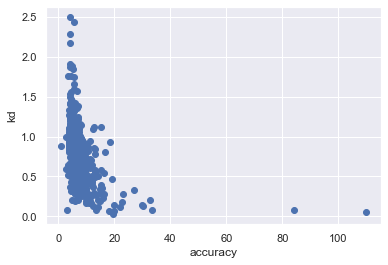

In [137]:
plt.scatter(df_demo.accuracy, df_demo.kdRatio)
plt.xlabel("accuracy")
plt.ylabel("kd")

Text(0, 0.5, 'kd')

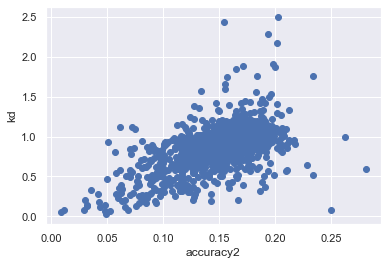

In [156]:
plt.scatter(df_demo.accuracy2, df_demo.kdRatio)
plt.xlabel("accuracy2")
plt.ylabel("kd")

(array([ 24.,  49.,  82., 148., 320., 237.,  53.,  13.,   5.,   7.]),
 array([0.02439024, 0.21300369, 0.40161714, 0.59023059, 0.77884403,
        0.96745748, 1.15607093, 1.34468438, 1.53329782, 1.72191127,
        1.91052472]),
 <BarContainer object of 10 artists>)

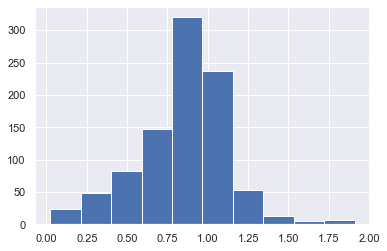

In [147]:
plt.hist(df_demo.kdRatio)

(array([  7.,  19.,  52., 105., 221., 324., 176.,  33.,   4.,   2.]),
 array([0.00902935, 0.03619659, 0.06336383, 0.09053107, 0.11769831,
        0.14486555, 0.17203279, 0.19920003, 0.22636727, 0.25353451,
        0.28070175]),
 <BarContainer object of 10 artists>)

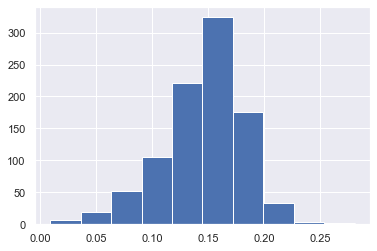

In [157]:
plt.hist(df_demo.accuracy2)

In [ ]:
df_demo = df_demo[['accuracy2', 'kdRatio']]

In [140]:
model = KMeans(n_clusters=4, init="k-means++", max_iter=100, n_init=5)
model.fit(df_demo)
y_kmeans = model.predict(df_demo)

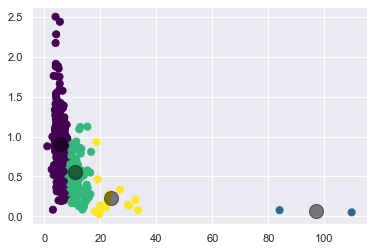

In [142]:
plt.scatter(df_demo.accuracy, df_demo.kdRatio, c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [143]:
df_demo = df_demo[(df_demo.kdRatio < 2) & (df_demo.accuracy < 40)]

In [144]:
model = KMeans(n_clusters=4, init="k-means++", max_iter=100, n_init=5)
model.fit(df_demo)
y_kmeans = model.predict(df_demo)

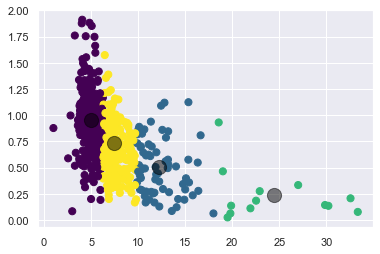

In [145]:
plt.scatter(df_demo.accuracy, df_demo.kdRatio, c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [108]:
df = df[df.gamesPlayed > 100]

In [95]:
# for tensorflow
# x does not have wins kills or deaths
X = np.array(df[['timePlayed']], dtype='float64')#, 'killstreak', 'level', 'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists', 'misses', 'xp', "scorePerMinute", 'shots']]
y = np.array(df[['wins']], dtype='float64')
print(X.shape)
print(y.shape)

(401, 1)
(401, 1)


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [109]:
# for clustering 
df = df[['wins', 'timePlayed']]

In [15]:
df.head()

,wins,timePlayed
5,684,1366
7,186,550
8,741,2442
15,207,378
16,106,255


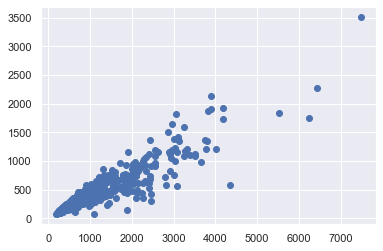

In [20]:
# too much data -- no clear clusters 
plt.scatter(df.timePlayed, df.wins)

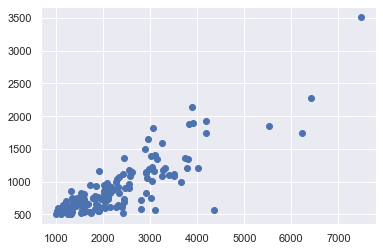

In [110]:
df = df[(df.timePlayed > 1000) & (df.wins >500)]
plt.scatter(df.timePlayed, df.wins)

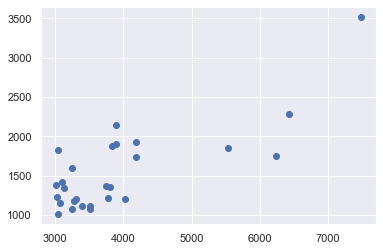

In [111]:
df = df[(df.timePlayed > 3000) & (df.wins >1000)]
plt.scatter(df.timePlayed, df.wins)

In [112]:
df.shape

(27, 2)

In [113]:
# Gaussian Mixture Model
gm = GaussianMixture(n_components=2, random_state=42).fit(df)

In [114]:
y_gmm = gm.predict(df)

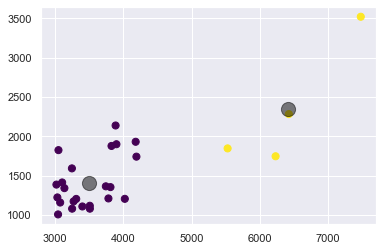

In [116]:
plt.scatter(df.timePlayed, df.wins, c=y_gmm, s=50, cmap='viridis')

centers = gm.means_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

## K Means

In [27]:
model = KMeans(n_clusters=4, init="k-means++", max_iter=100, n_init=5)
model.fit(df)

KMeans(max_iter=100, n_clusters=4, n_init=5)

In [32]:
y_kmeans = model.predict(df)


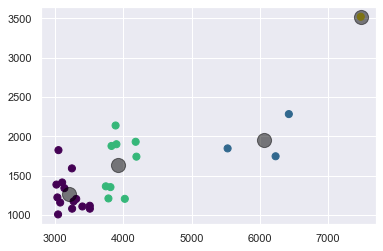

In [34]:
plt.scatter(df.timePlayed, df.wins, c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

In [36]:
mean_shift_model = MeanShift()
mean_shift_model.fit(df)

MeanShift()

In [37]:
y_meanshift = mean_shift_model.predict(df)


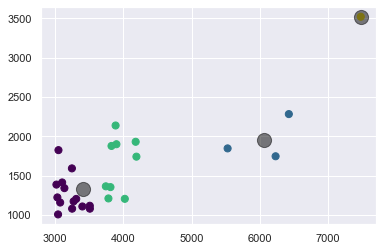

In [38]:
plt.scatter(df.timePlayed, df.wins, c=y_kmeans, s=50, cmap='viridis')

centers = mean_shift_model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

In [97]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [98]:
tf_model.compile(loss="mean_squared_error", optimizer="adam")

In [100]:
history = tf_model.fit(x_train, y_train, verbose=2, epochs=100)

Epoch 1/100
10/10 - 0s - loss: 5181634.0000 - 11ms/epoch - 1ms/step
Epoch 2/100
10/10 - 0s - loss: 5113039.0000 - 14ms/epoch - 1ms/step
Epoch 3/100
10/10 - 0s - loss: 5046701.0000 - 14ms/epoch - 1ms/step
Epoch 4/100
10/10 - 0s - loss: 4981685.5000 - 15ms/epoch - 1ms/step
Epoch 5/100
10/10 - 0s - loss: 4914435.0000 - 12ms/epoch - 1ms/step
Epoch 6/100
10/10 - 0s - loss: 4850065.0000 - 9ms/epoch - 893us/step
Epoch 7/100
10/10 - 0s - loss: 4784543.0000 - 10ms/epoch - 989us/step
Epoch 8/100
10/10 - 0s - loss: 4720438.0000 - 10ms/epoch - 1ms/step
Epoch 9/100
10/10 - 0s - loss: 4659968.0000 - 10ms/epoch - 1ms/step
Epoch 10/100
10/10 - 0s - loss: 4592605.0000 - 11ms/epoch - 1ms/step
Epoch 11/100
10/10 - 0s - loss: 4532377.0000 - 8ms/epoch - 844us/step
Epoch 12/100
10/10 - 0s - loss: 4474139.0000 - 8ms/epoch - 836us/step
Epoch 13/100
10/10 - 0s - loss: 4411409.0000 - 13ms/epoch - 1ms/step
Epoch 14/100
10/10 - 0s - loss: 4351025.5000 - 13ms/epoch - 1ms/step
Epoch 15/100
10/10 - 0s - loss: 428927

In [101]:
y_pred = tf_model.predict(x_test)

In [102]:
mse = mean_squared_error(y_test, y_pred)

In [103]:
mse 

1353232.9552694804

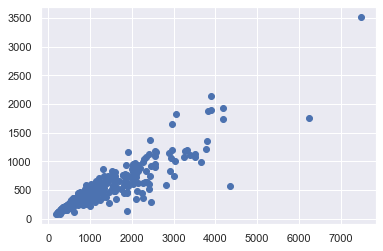

In [104]:
plt.scatter(x_train,y_train)

In [ ]:
# there could be a linear relationship but our model is extremely inaccurate 